# Web Scraping

## What is Web Scraping?

 - Web scraping is an automated method used to extract large amounts of data from websites. The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form. There are different ways to scrape websites such as online Services, APIs or writing your own code. 
Here, we’ll see how to implement web scraping with python. 

![](web-scraping-image.jpg)

## How Do You Scrape Data From A Website?

When you run the code for web scraping, a request is sent to the URL that you have mentioned. As a response to the request, the server sends the data and allows you to read the HTML or XML page. The code then, parses the HTML or XML page, finds the data and extracts it. 

 - To extract data using web scraping with python, you need to follow these basic steps:
<a id='Find the URL that you want to scrape'></a>
 - Step 1. [Find the URL that you want to scrape.](#Find-the-URL-that-you-want-to-scrape)
<a id='Use the requests library to download web pages'></a>    
 - Step 2: [Use the requests library to download web pages.](#Use-the-requests-library-to-download-web-pages)
<a id='Use Beautiful Soup to parse and extract information'></a>    
 - Step 3: [Use Beautiful Soup to parse and extract information.](#Use-Beautiful-Soup-to-parse-and-extract-information)
<a id='Inspecting the Page'></a>
 - Step 4. [Inspecting the Page](#Inspecting-the-Page)
<a id='Create a Dataframe of the extracted information using Pandas'></a>    
 - Step 5: [Create a Dataframe of the extracted information using Pandas.](#Create-a-Dataframe-of-the-extracted-information-using-Pandas)
<a id='Store the data in the required format '></a>
 - Step 6. [Store the data in the required format.](#Store-the-data-in-the-required-format) 
<a id='Inspecting the Page'></a>
 - Step 7: [Data Visualization](#Data-Visualization)




### Step 1: Find the URL that you want to scrape

 - Browse through different sites and pick on to scrape. Check the "Project Ideas" section for inspiration.
 - Identify the information you'd like to scrape from the site. Decide the format of the output CSV file.
 - Summarize your project idea and outline your strategy in a Juptyer notebook. Use the "New" button above.

#### Project Outline 

1. Get book name, author name, star rating, rating count, price and URL of the book.
2. Create a dataframe.
3. Create a CSV file of the dataframe.
4. Perform data visualization

Here, we are going scrape Flipkart website to extract the information of books. The URL for this page is : 

'https://www.flipkart.com/search?q=book&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&p%5B%5D=facets.language%255B%255D%3DEnglish'

### Libraries used for Web Scraping 

As we know, Python has various applications and there are different libraries for different purposes.So, here I will be using the following libraries:

 - Requests library: The requests module allows you to send HTTP requests using Python.The HTTP request returns a Response Object with all the response data (content, encoding, status, etc). You can check the documentation [here](https://docs.python-requests.org/en/master/)
 

 - BeautifulSoup: Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that is helpful to extract the data easily.[Documentation of BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)
 

 - Pandas: Pandas is a library used for data manipulation and analysis. It is used to extract the data and store it in the desired format. 

### Step 2: Use the requests library to download web pages

 - Inspect the website's HTML source and identify the right URLs to download.
 - Download and save web pages locally using the requests library.
 - Create a function to automate downloading for different topics/search queries.

In [88]:
!pip install requests --upgrade --quiet

In [89]:
import requests

In [4]:
site_url = 'https://www.flipkart.com/search?q=book&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=off&as=off&p%5B%5D=facets.language%255B%255D%3DEnglish'

In [5]:
response = requests.get(site_url)

In [6]:
response.status_code             #check whether response is successful or not

200

In [7]:
len(response.text)

506755

In [8]:
page_contents = response.text

In [9]:
page_contents[:1000]

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/www/linchpin/fk-cp-zion/css/app.chunk.3e7df7.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https://static-assets-web.flixcart.com/www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.png"/><link rel="apple-touch-icon" sizes="72x72" href="/apple-touch-icon-72x72.png"/><link rel="apple-

###  Step 3: Use Beautiful Soup to parse and extract information

 - Parse and explore the structure of downloaded web pages using Beautiful soup.
 - Use the right properties and methods to extract the required information.
 - Create functions to extract from the page into lists and dictionaries.
 - (Optional) Use a REST API to acquire additional information if required.

In [10]:
!pip install beautifulsoup4   --upgrade --quiet

In [11]:
from bs4 import BeautifulSoup 

In [12]:
doc = BeautifulSoup(page_contents, 'html.parser')

### Step 4: Inspecting the Page

 - The data is usually nested in tags. So, we inspect the page to see, under which tag the data we want to scrape is nested.
 - To inspect the page, just right click on the element and click on “Inspect”.

#### Get Title of the books

In [13]:
#Search for the tag which contains book titles

book_title_tags = doc.find_all('a', {'class' : 's1Q9rs'})

In [14]:
len(book_title_tags)

40

In [15]:
#Create a list for all the book titles.

book_titles = []

for tag in book_title_tags:
    book_titles.append(tag.text)

In [16]:
book_title_tags[0].text             #Name of the first book

'Miss & Chief Nursery English Worksheets (Paperback)'

#### Get the URLs of the books

In [17]:
#Search for the tag which contains URL of the book

book_link_tags = doc.find_all('a', {'class' : 's1Q9rs'})

In [18]:
book_link_tags[0]['href']

'/miss-chief-nursery-english-worksheets-paperback/p/itmf161652062749?pid=RBKG3GPE5NWKMHFH&lid=LSTRBKG3GPE5NWKMHFHRQBYF0&marketplace=FLIPKART&q=book&store=bks&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=en_IFfLk6h3J8yFz5ucnfYzBs00MvfUHbWvV69%2Fk%2BMxweZmSYHRDzZlFfvvYFU9Cl4mDcRxlNFjDm0Pgh7wEdb0cg%3D%3D&ppt=None&ppn=None&ssid=rcz7xnpq1s0000001625754161047&qH=821f03288846297c'

In [19]:
base0_url = 'https://www.flipkart.com' 
book0_url = base0_url + book_link_tags[0]['href']

In [20]:
book0_url                #URL of the 1st book

'https://www.flipkart.com/miss-chief-nursery-english-worksheets-paperback/p/itmf161652062749?pid=RBKG3GPE5NWKMHFH&lid=LSTRBKG3GPE5NWKMHFHRQBYF0&marketplace=FLIPKART&q=book&store=bks&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=en_IFfLk6h3J8yFz5ucnfYzBs00MvfUHbWvV69%2Fk%2BMxweZmSYHRDzZlFfvvYFU9Cl4mDcRxlNFjDm0Pgh7wEdb0cg%3D%3D&ppt=None&ppn=None&ssid=rcz7xnpq1s0000001625754161047&qH=821f03288846297c'

In [21]:
#Create a list for all the URLs

book_url = []
base_url = 'https://www.flipkart.com'

for tag in book_link_tags:
    book_url.append(base_url + tag['href'])
    
book_url[:2]      #Shows 1st two URLs

['https://www.flipkart.com/miss-chief-nursery-english-worksheets-paperback/p/itmf161652062749?pid=RBKG3GPE5NWKMHFH&lid=LSTRBKG3GPE5NWKMHFHRQBYF0&marketplace=FLIPKART&q=book&store=bks&srno=s_1_1&otracker=search&otracker1=search&fm=organic&iid=en_IFfLk6h3J8yFz5ucnfYzBs00MvfUHbWvV69%2Fk%2BMxweZmSYHRDzZlFfvvYFU9Cl4mDcRxlNFjDm0Pgh7wEdb0cg%3D%3D&ppt=None&ppn=None&ssid=rcz7xnpq1s0000001625754161047&qH=821f03288846297c',
 'https://www.flipkart.com/my-first-learning-library-10-board-books-gift-box-set-kids-wall-mountable-easily-retractable/p/itmddf60b4bb1020?pid=9788194784609&lid=LSTBOK9788194784609PX12FI&marketplace=FLIPKART&q=book&store=bks&srno=s_1_2&otracker=search&otracker1=search&fm=organic&iid=en_IFfLk6h3J8yFz5ucnfYzBs00MvfUHbWvV69%2Fk%2BMxweYths35u2NoC%2FBcNIzOybCgJkRDwhks%2BKaz5YqB7X5LNA%3D%3D&ppt=None&ppn=None&ssid=rcz7xnpq1s0000001625754161047&qH=821f03288846297c']

In [22]:
len(book_url)

40

#### Get discount price for all the books

In [43]:
#Search for the tag which contains discount price tags

discount_price_tags = doc.find_all('div', {'class' : '_30jeq3'})

In [44]:
len(discount_price_tags)

40

In [45]:
discount_price_tags[0].text

'₹209'

In [48]:
#Create a list for all the discount prices for books.

discount_price = []

for tag in discount_price_tags:
    discount_price.append(tag.text)

In [49]:
discount_price[:5]

['₹209', '₹399', '₹465', '₹67', '₹205']

#### Get original price for all the books

In [ ]:
<div class="_3I9_wc">₹<!-- -->749</div>

In [77]:
#Search for the tag which contains original price tags

original_price_tags = doc.find_all('div', {'class' : '_3I9_wc'})

In [78]:
len(original_price_tags)

39

In [79]:
original_price_tags[0].text

'₹220'

In [80]:
#Create a list for all the discount prices for books.

original_price = []

for tag in original_price_tags:
    original_price.append(tag.text)

In [81]:
original_price[:5]

['₹220', '₹899', '₹749', '₹199', '₹285']

#### Get author name

In [27]:
#Search for the tag which contains author name

lang_binding_author_tag = doc.find_all('div', {'class' : '_3Djpdu'})

In [28]:
len(lang_binding_author_tag)

40

In [29]:
lang_binding_author_tag[0].text.split(',')[-1].strip()

'Unknown'

In [30]:
#Create a list for all author names.

lang_binding_author = []

for tag in lang_binding_author_tag:
    lang_binding_author.append(tag.text.strip().split(',')[-1])

In [31]:
lang_binding_author[:10]

[' Unknown',
 ' Divya Nath',
 ' Aggarwal R. S.',
 ' Napoleon H.',
 ' Bakshi S.P.',
 ' Bond Ruskin',
 ' Lewis Norman',
 ' unknown',
 ' unknown',
 ' Raina Suresh']

#### Get rating count

In [32]:
rating_count_tags = doc.find_all('span', {'class' : '_2_R_DZ'})

In [33]:
len(rating_count_tags)

30

In [34]:
rating_count_tags[0].text

'(30)'

In [35]:
#Create a list

rating_count = []

for tag in rating_count_tags:
    rating_count.append(tag.text)

In [36]:
rating_count[:5]

['(30)', '(51,729)', '(28,325)', '(48,972)', '(10,224)']

#### Get star rating

In [37]:
star_rating_tags = doc.find_all('div', {'class' : "_3LWZlK"})

In [38]:
len(star_rating_tags)

30

In [39]:
star_rating_tags[0].text

'4.3'

In [40]:
#Create a list

star_rating = []

for tag in star_rating_tags:
    star_rating.append(tag.text)

In [41]:
star_rating[:5]

['4.3', '4.4', '4.5', '4.4', '4.5']

### Step 5: Create a Dataframe of the extracted information using Pandas.

 - Create functions for the end-to-end process of downloading, parsing, and saving CSVs.
 - Execute the function with different inputs to create a dataset of CSV files.
 - Verify the information in the CSV files by reading them back using Pandas.

In [82]:
#Create a dictionary, all keys corresponds to column names and value corresponds to list


book_dict = {
          'Title' : book_titles,
          'Author_name' : lang_binding_author,
          'Discount_price' : discount_price,
          'Original_price' : original_price,
           'Star_rating' : star_rating,
           'Rating_count' : rating_count,
            'URL' : book_url
}

In [83]:
import pandas as pd

In [84]:
BOOKS_df = pd.DataFrame.from_dict(book_dict, orient = 'index')
book_df = BOOKS_df.transpose()

In [85]:
book_df.head()

,Title,Author_name,Discount_price,Original_price,Star_rating,Rating_count,URL
0,Miss & Chief Nursery English Worksheets (Paper...,Unknown,₹209,₹220,4.3,(30),https://www.flipkart.com/miss-chief-nursery-en...
1,My First Learning Library (10 Board Books) - G...,Divya Nath,₹399,₹899,4.4,"(51,729)",https://www.flipkart.com/my-first-learning-lib...
2,Quantitative Aptitude for Competitive Examinat...,Aggarwal R. S.,₹465,₹749,4.5,"(28,325)",https://www.flipkart.com/quantitative-aptitude...
3,The Power of Your Subconscious Mind,Napoleon H.,₹67,₹199,4.4,"(48,972)",https://www.flipkart.com/power-your-subconscio...
4,Objective General English,Bakshi S.P.,₹205,₹285,4.5,"(10,224)",https://www.flipkart.com/objective-general-eng...


### Step 6: Store the data in a required format

 - After extracting the data, you might want to store it in a format. 
 - This format varies depending on your requirement.
 - For this example, we will store the extracted data in a CSV (Comma Separated Value) format.
 - To do this, I will add the following line to my code:

In [87]:
book_df.to_csv('BOOKS.csv', index=False,header=True, encoding='utf-8')

#### A file name “BOOKS.csv” is created and this file contains the extracted data.

![](xl-image.png)

# Data Visualization

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [60]:
book_df =pd.read_csv('BOOKS.csv')

In [61]:
book_df.head()

,Title,Author_name,Discount_price,Original_price,Star_rating,Rating_count,URL
0,Miss & Chief Nursery English Worksheets (Paper...,Unknown,₹209,₹209,4.3,(30),https://www.flipkart.com/miss-chief-nursery-en...
1,My First Learning Library (10 Board Books) - G...,Divya Nath,₹399,₹399,4.4,"(51,729)",https://www.flipkart.com/my-first-learning-lib...
2,Quantitative Aptitude for Competitive Examinat...,Aggarwal R. S.,₹465,₹465,4.5,"(28,325)",https://www.flipkart.com/quantitative-aptitude...
3,The Power of Your Subconscious Mind,Napoleon H.,₹67,₹67,4.4,"(48,972)",https://www.flipkart.com/power-your-subconscio...
4,Objective General English,Bakshi S.P.,₹205,₹205,4.5,"(10,224)",https://www.flipkart.com/objective-general-eng...


array([[<AxesSubplot:title={'center':'Star_rating'}>]], dtype=object)

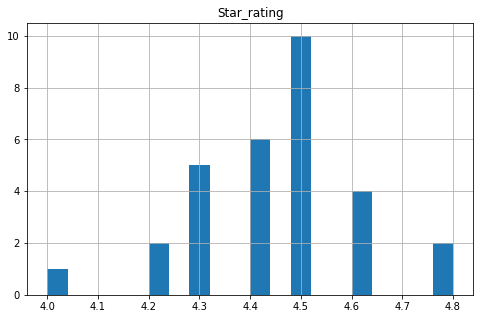

In [64]:
book_df.hist(bins=20,figsize=(8,5))

#### Observation:

 - Maximum books received rating 4.5

#### What is the Average rating for specific book?

In [67]:
rating=book_df.groupby("Title").agg({
    "Star_rating" : "sum"
}).sort_values('Star_rating',ascending=False)[:10]

rating.head(10)

,Star_rating
Title,
Miss & Chief 101 Animals Stories (Paperback),4.8
Indian Coast Guard Navik Gd/Db /Yantrik Section 1 Guide...,4.8
India's Struggle for Independence 1857-1947,4.6
Miss & Chief Pre School Books - Pack (6 Titles) (Paperb...,4.6
Three Thousand Stitches,4.6
Miss & Chief 505 Activities For Kids,4.6
13 Years Solved Papers NEET 2021,4.5
Quantitative Aptitude for Competitive Examinations - Qu...,4.5
Objective General English,4.5


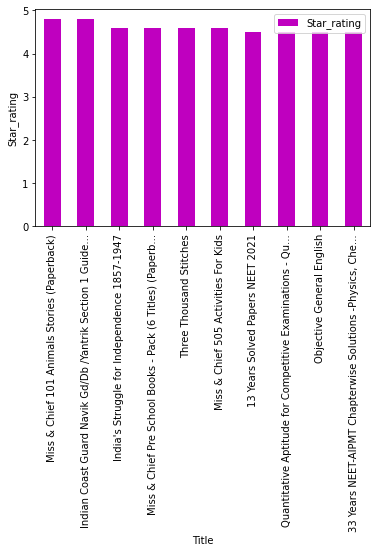

In [90]:
rating.plot(kind ="bar", color = 'm')
plt.ylabel("Star_rating")
plt.show()

#### Observation:

 - Maximum star rating received is 4.8 by book named Miss & Chief 101 Animals Stories.